In [48]:
# Importing libraries
import geopandas as gpd
import geoplot as gplt
from shapely.geometry import Polygon, mapping
from visualization_methods import *

# TODO: Modularizing code
# Make all methods that edit the map be decorators that take in
# Some ax (and maybe color) and return it after they've added their one thing

# A plot initializer, that takes in the requested size

# Need to create a key / legend

In [49]:
# Data cleaning methods
# clean_points - input geodataframe, removes any null point geometries
# If not, the pointplot gets angry
def clean_points(gdf):
    gdf = gdf[gdf.geometry.type == 'Point']
    return gdf

# clean_lineString - input geodataframe, converts LineString geometry to polygon
# This is because polyplot does not work on LineStrings!
# Please note that this actually fucking sucks
def clean_lineString(gdf):
    gdf['geometry'] = [Polygon(mapping(x)['coordinates']) for x in gdf.geometry]
    return gdf

<AxesSubplot:>

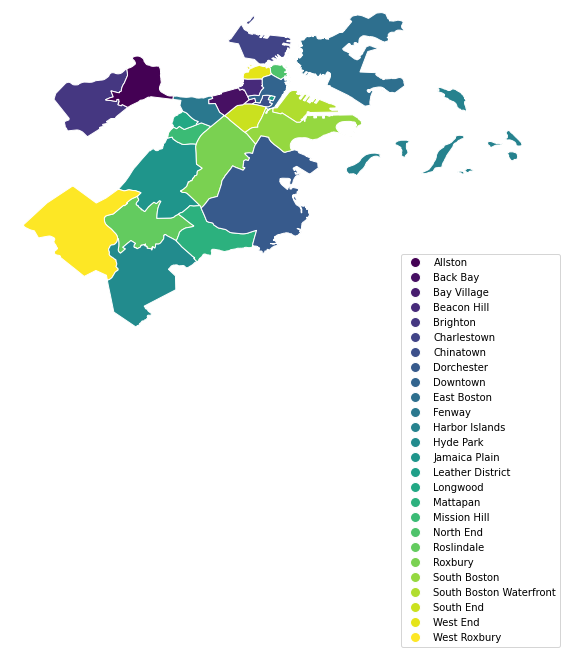

In [60]:
# Base map
boston = (-71.2, 42.2, -70.9, 42.4)
boston_neighborhoods = gpd.read_file('datasets/Boston_Neighborhoods.geojson')
gplt.choropleth(boston_neighborhoods, extent=boston, edgecolor='white', hue= 'Name', figsize=(10, 10),
                legend= True, legend_kwargs={'bbox_to_anchor': (1, 0.35)}, cmap= 'viridis')

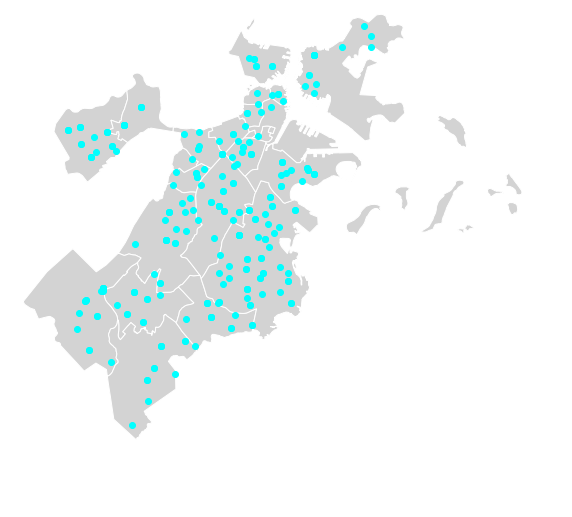

In [53]:
# Add polling locations [Point data type]
ax = init(10, 10, 'white', 'lightgray')
ax = add_polling_locations(ax, "cyan")

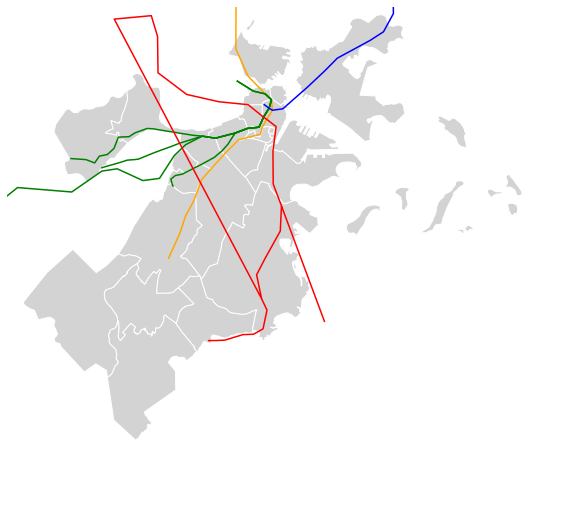

In [52]:
# Adding subway routes [LineString data type]
# Note that geoplot cannot plot linestrings!
# to plot a linestring, you must use the geopandas.plot method
ax = init(10, 10, 'white', 'lightgray')
ax = add_subway(ax)